Dataset description

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum." This data set contains a combination of numerical and categorical features:

categorical

Country Year: 1985 to 2016 Sex: Male/female Age: Five age groups Generation

Numerical

Population Number of Suicides: Suicide incidences Suicides per 100k people:normalized version of suicide incidences GDP for year: Gross Domestic Product(a measure of economic development) GDP per capita for year: GDP/population HDI for year : Human Development Index

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

# Import Dataset

In [5]:
df = pd.read_csv('C:/Users/User/OneDrive/Desktop/master.csv')

# EDA

In [6]:
df.shape

(27820, 12)

We can see that there are 27820 instances and 12 variables in the data set.

In [7]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k',
                      'country-year', 'yearlyHDI', 'GDPpyear', 'GDPpcapita', 'generation']

df.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,GDPpcapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The original data set contains data from more than 100 countries during 1985-2016. I've decided to limit the number of countries to make the analysis more insightful. I've chosen 40 countries from different parts of the world that I believe are a good sample of the different regions.

In [8]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

Text(0.5, 0, 'Suicides per 100K')

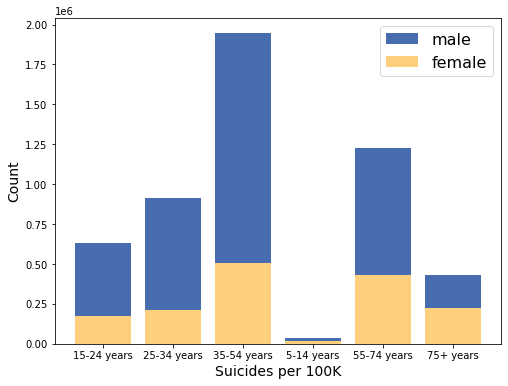

In [9]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

<center>FIG.NO-1</center>

Male population around the age of 35-54 years are more prone to suicidal attacks.

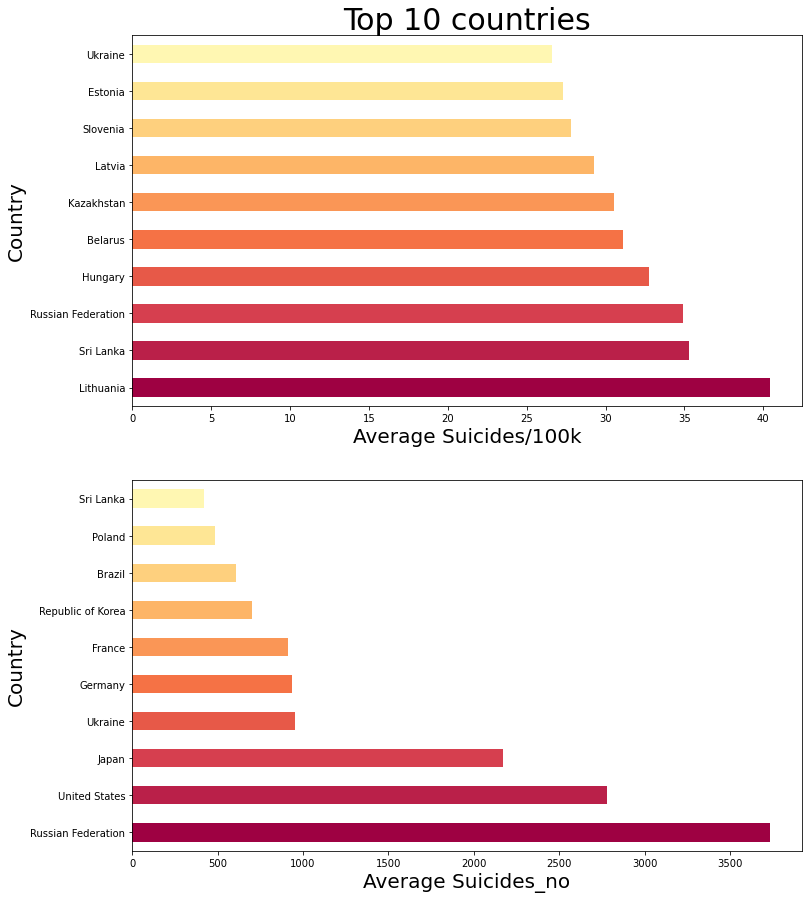

In [10]:
plt.figure(figsize=(12, 15))


plt.subplot(211)
df.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

<center>FIG.NO-2</center>

It can be seen that Russian Federation holds the top position of having more number of suicides.

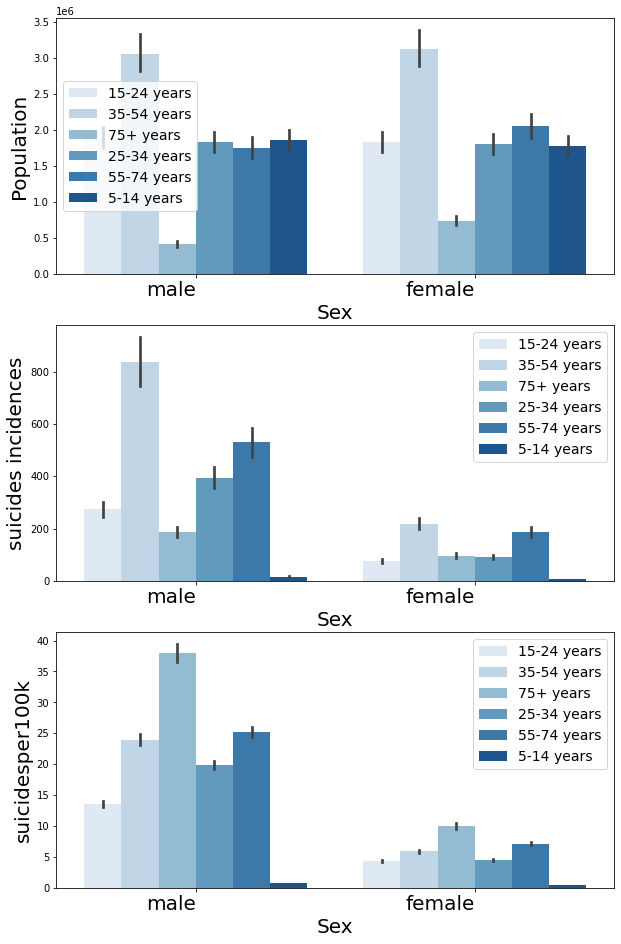

In [11]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='suicidesper100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

<center>FIG.NO-3</center>

Suicide incidences are more among the age group of 35-54 years in both the genders.

In population perspective, 35-54 years age group are more prone to suicides.

Importing the suicide data set with extra features added from WDI database

In [12]:
extra_data = pd.read_csv('C:/Users/User/OneDrive/Desktop/suicidedataextrafestures.csv')

extra_data.columns = [
    'country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation',
    'Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal', 'Lifeexpectancy', 'Mobilesubscriptionsp100',
    'Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [13]:
extra_data.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df1 = extra_data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 1995]
df = df[df.year <= 2013]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 120 to 14821
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9216 non-null   object 
 1   year                     9216 non-null   int64  
 2   sex                      9216 non-null   object 
 3   age                      9216 non-null   object 
 4   suicides_no              9216 non-null   int64  
 5   population               9216 non-null   int64  
 6   suicidesper100k          9216 non-null   float64
 7   country-year             9216 non-null   object 
 8   yearlyHDI                3264 non-null   float64
 9   GDPpyear                 9216 non-null   float64
 10  GDPpcapita               9216 non-null   int64  
 11  generation               9216 non-null   object 
 12  suicide%                 9216 non-null   float64
 13  Internetusers            9132 non-null   float64
 14  Expenses             

In [16]:
#frequency count of categorical variables
col_names = ['country', 'sex', 'age', 'country-year', 'generation']


for col in col_names:
    
    print(df[col].value_counts())

Argentina             228
Norway                228
Israel                228
Italy                 228
Japan                 228
Mexico                228
Netherlands           228
New Zealand           228
Romania               228
Hungary               228
Russian Federation    228
Spain                 228
Sweden                228
Switzerland           228
Turkmenistan          228
United Kingdom        228
Iceland               228
Ireland               228
Greece                228
Colombia              228
Austria               228
Belgium               228
Brazil                228
Bulgaria              228
Canada                228
Chile                 228
Germany               228
United States         228
Croatia               228
Cuba                  228
Czech Republic        228
Denmark               228
Finland               228
France                228
South Africa          216
Thailand              216
Ukraine               216
Australia             216
Poland      

From all the extra features added from the WDI database, I'm using 11 features for exploring. These are basically the features with fewer null values.

totalfeatures: 'country', 'year','GDPpyear','GDPpcapita','employeecompensation','Unemployment', 'Lifeexpectancy','Refugees','Selfemployed','Internetusers','population'.

I'm aslo lifting the fine subsample level of sex and age group. I'm creating a new pandas data frame "total", with a new column "suicides" as the total value of Suicides per 100k of population per country per year, calculated by summing over both sexes and age groups.

In [17]:
features = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
            'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()
total['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

In [18]:
total.head()

,year,GDPpyear,GDPpcapita,employeecompensation,Unemployment,Lifeexpectancy,Refugees,Selfemployed,Internetusers,Suicides,population,country
0,1995,2.580320e+11,8232.0,17.243447,18.799999,72.651,330.0,1.409,0.086277,119.97,243164200.0,Argentina
1,1996,2.721500e+11,8563.0,16.401037,17.110001,72.843,217.0,1.665,0.141955,118.03,245997800.0,Argentina
2,1997,2.928590e+11,9057.0,16.412140,14.820000,73.029,159.0,1.541,0.280340,111.40,248486400.0,Argentina
3,1998,2.989480e+11,9126.0,15.014755,12.650000,73.213,142.0,1.326,0.830767,116.93,251332500.0,Argentina
4,1999,2.835230e+11,8546.0,15.078509,14.050000,73.396,586.0,1.355,3.284482,117.19,253748671.0,Argentina


In [19]:
totalfeatures = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
                 'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers', 'population']

Text(0.5, 0, 'GDP')

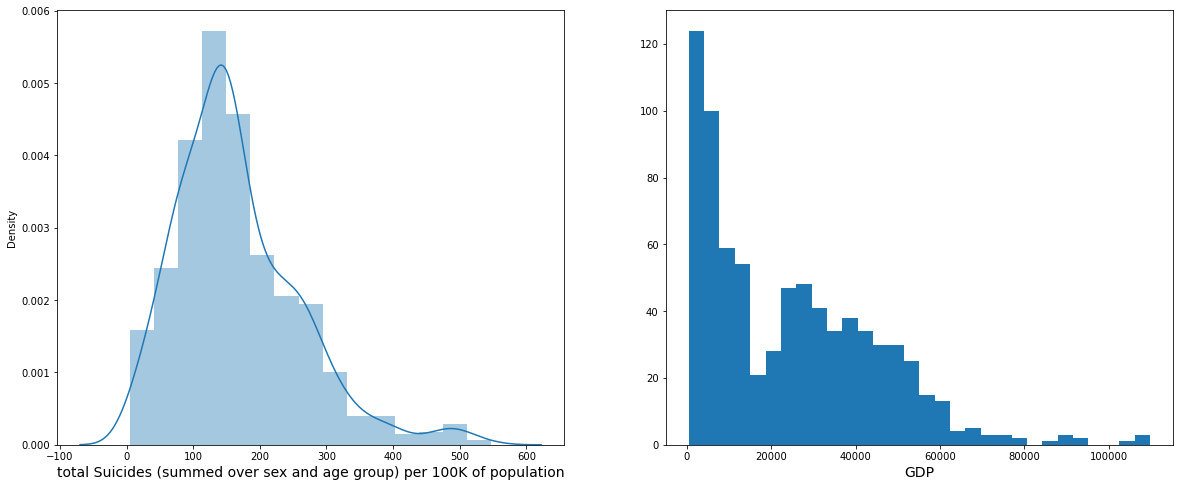

In [20]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.Suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.GDPpcapita, bins=30)
plt.xlabel('GDP', fontsize=14)

<center>FIG.NO-4</center>

# Correlation for selected features

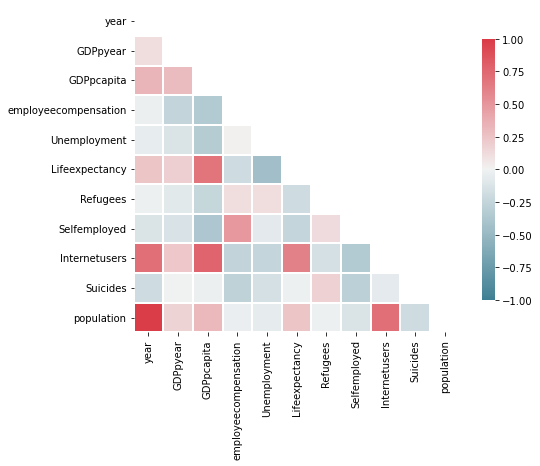

In [21]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

<center>FIG.NO-5</center>

The feature "Internetusers" is strongly correlated with GDP features, as expected. "Lifeexpectancy" also shows strong corrlaiton with GDP per capital. This should be noted when evaluating feature importances from model outputs. Other features do not show strong correlations.

# Preprocessing to remove nulls

In [22]:
# Cleaning the data, replacing null values with appropriate replacements

total.Internetusers.fillna(total.Internetusers. min(), inplace=True)
total.Refugees.fillna(8, inplace=True)
total.employeecompensation.fillna(total.employeecompensation.mean(), inplace=True)
total.population.fillna(total.population.mean(), inplace=True)

Binary classification for suicide risk

I decided to perform a binary classification on the suicide data, by assigning risk classes based on the suicide incidences per 100k of the population as high/low suicide risk. Adding an extra column to the "total" data frame as 'risk'.

Suicides<mean(Suicides) --> low risk --> class 0 Suicides>mean(Suicides) --> high risk --> class 1

In [23]:
total['risk'] = total.Suicides.copy()

total['risk'] = np.where(total.risk < total.Suicides.mean(), 0, 1)

In [24]:
total.head(5)

,year,GDPpyear,GDPpcapita,employeecompensation,Unemployment,Lifeexpectancy,Refugees,Selfemployed,Internetusers,Suicides,population,country,risk
0,1995,2.580320e+11,8232.0,17.243447,18.799999,72.651,330.0,1.409,0.086277,119.97,243164200.0,Argentina,0
1,1996,2.721500e+11,8563.0,16.401037,17.110001,72.843,217.0,1.665,0.141955,118.03,245997800.0,Argentina,0
2,1997,2.928590e+11,9057.0,16.412140,14.820000,73.029,159.0,1.541,0.280340,111.40,248486400.0,Argentina,0
3,1998,2.989480e+11,9126.0,15.014755,12.650000,73.213,142.0,1.326,0.830767,116.93,251332500.0,Argentina,0
4,1999,2.835230e+11,8546.0,15.078509,14.050000,73.396,586.0,1.355,3.284482,117.19,253748671.0,Argentina,0


In [25]:
total.columns

Index(['year', 'GDPpyear', 'GDPpcapita', 'employeecompensation',
       'Unemployment', 'Lifeexpectancy', 'Refugees', 'Selfemployed',
       'Internetusers', 'Suicides', 'population', 'country', 'risk'],
      dtype='object')

Text(0.5, 0, 'Suicides')

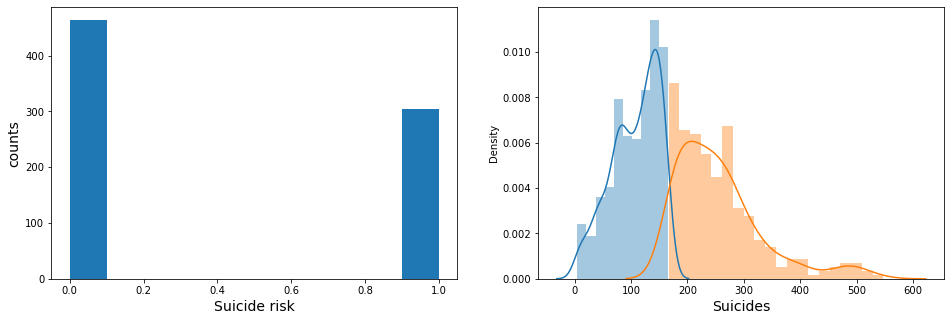

In [26]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.risk)
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(total.Suicides[total.risk == 0], bins=10)
sns.distplot(total.Suicides[total.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

<center>FIG.NO-6</center>

The risk is low in most of the cases as 0's are present more.

In [27]:
# Label encoding countries

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

total.country = le.fit_transform(total.country)  # Alphabetic order [0:40]
total.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [28]:
total['risk'].unique()

array([0, 1])

# Preparing data for model building

In [29]:
# Preparing data for modeling

X = total[totalfeatures]
y = total['risk']


# Applying standard scaler on data, since ML algorithms work with the assumption that the data is normally distributed

scaler = StandardScaler()

In [30]:
X

,country,year,GDPpyear,GDPpcapita,employeecompensation,Unemployment,Lifeexpectancy,Refugees,Selfemployed,Internetusers,population
0,0,1995,2.580320e+11,8232.0,17.243447,18.799999,72.651000,330.0,1.409,0.086277,2.431642e+08
1,0,1996,2.721500e+11,8563.0,16.401037,17.110001,72.843000,217.0,1.665,0.141955,2.459978e+08
2,0,1997,2.928590e+11,9057.0,16.412140,14.820000,73.029000,159.0,1.541,0.280340,2.484864e+08
3,0,1998,2.989480e+11,9126.0,15.014755,12.650000,73.213000,142.0,1.326,0.830767,2.513325e+08
4,0,1999,2.835230e+11,8546.0,15.078509,14.050000,73.396000,586.0,1.355,3.284482,2.537487e+08
...,...,...,...,...,...,...,...,...,...,...,...
763,40,2009,1.441870e+13,50563.0,9.894976,9.254000,78.390244,2368.0,0.065,71.000000,2.712631e+08
764,40,2010,1.496440e+13,51989.0,10.015809,9.633000,78.541463,3026.0,0.084,71.690000,2.712631e+08
765,40,2011,1.551790e+13,53452.0,10.132760,8.949000,78.641463,3778.0,0.076,69.729461,2.712631e+08
766,40,2012,1.615530e+13,55170.0,10.236160,8.069000,78.741463,4456.0,0.077,74.700000,2.712631e+08


In [31]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (576, 11) (576,)
Test set: (192, 11) (192,)


In [32]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [33]:
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test = pd.DataFrame(X_test,columns=X.columns)

In [34]:
X_train

,country,year,GDPpyear,GDPpcapita,employeecompensation,Unemployment,Lifeexpectancy,Refugees,Selfemployed,Internetusers,population
0,-0.925975,-1.253808,-0.378621,-1.026224,-0.022893,0.663960,-0.771033,-0.236169,0.548261,-1.163506,-1.397861
1,-1.011299,1.467343,-0.303014,-0.371619,0.700068,-0.380214,0.601516,-0.258050,0.051827,0.637086,1.364815
2,-1.608569,-0.528168,-0.427878,-1.148270,-0.022893,0.530414,-0.787416,-0.149897,3.605372,-1.127805,-0.342333
3,-1.693893,0.741703,-0.258518,-0.699818,-0.022893,-0.155796,-0.193881,-0.259925,-0.468705,-0.252890,0.712378
4,-1.437921,-1.435218,-0.317089,0.357212,-0.640072,-0.642734,0.167425,-0.277698,0.072723,-0.953425,-1.552915
...,...,...,...,...,...,...,...,...,...,...,...
571,-0.072733,-1.253808,-0.425320,0.292580,2.082460,-0.940118,0.546789,-0.278537,-0.530077,-0.273829,-1.397861
572,1.463103,1.285933,-0.415102,-0.870555,-0.022893,-0.891348,-1.704834,-0.265659,-0.168811,-1.016501,1.208222
573,0.268564,-0.709578,1.874016,0.800673,-1.304211,-0.753420,0.959313,-0.278537,0.388996,-0.190840,-0.540554
574,-0.925975,-0.528168,-0.382605,-1.047736,-0.022893,1.216434,-0.516069,0.041777,0.477100,-1.087395,-0.342333


# RANDOM FOREST CLASSIFIER

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.metrics import accuracy_score


In [37]:
from sklearn import tree

In [38]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9740


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       120
           1       0.99      0.94      0.96        72

    accuracy                           0.97       192
   macro avg       0.98      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192



Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# Random Forest Classifier model with parameter n_estimators=100 

In [40]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9740


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       120
           1       0.99      0.94      0.96        72

    accuracy                           0.97       192
   macro avg       0.98      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192



The model accuracy score with 10 decision-trees is 0.9740 but the same with 100 decision-trees is also 0.9740. So, I expected that accuracy increases with number of decision-trees in the model.But it is like the model has converged to give the same accuracy.

# Finding Important Features

In [42]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

employeecompensation    0.153353
Selfemployed            0.151982
country                 0.150458
Refugees                0.130861
GDPpyear                0.126355
GDPpcapita              0.072697
Lifeexpectancy          0.070951
Unemployment            0.051630
Internetusers           0.045504
year                    0.024888
population              0.021321
dtype: float64

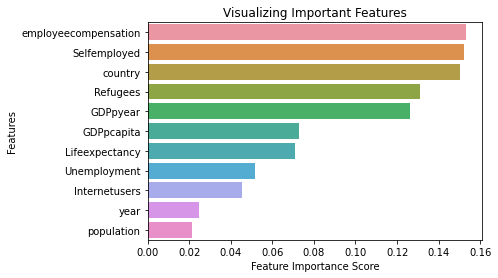

In [44]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()


<center>FIG.NO-7</center>

We can see that the most important feature is employeecompensation and least important feature is population.

# Model with selected features

In [45]:
# declare feature vector and target variable

# Preparing data for modeling

X = total.drop(['population','risk'],axis=1)
y = total['risk']


# Applying standard scaler on data, since ML algorithms work with the assumption that the data is normally distributed

scaler = StandardScaler()



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (576, 11) (576,)
Test set: (192, 11) (192,)


In [47]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [48]:
# instantiate the classifier 

rfc1 = RandomForestClassifier(random_state=0)



# fit the model

rfc1.fit(X_train, y_train)



# Predict the Test set results

y_pred1 = rfc1.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score with 10 decision-trees : 1.0000


In [49]:
# instantiate the classifier with n_estimators = 100

rfc1_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc1_100.fit(X_train, y_train)



# Predict on the test set results

y_pred1_100 = rfc1_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred1_100)))

Model accuracy score with 100 decision-trees : 1.0000


In [52]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[120   0]
 [  0  72]]


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        72

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



I have removed the 'population' variable from the model, rebuild it and checked its accuracy.

The accuracy of the model with population variable removed is 1.0000.

The accuracy of the model with all the variables taken into account is 0.9740.

So, we can see that the model accuracy has been improved with 'population' variable removed from the model.

# K-fold Validation

In [62]:
from sklearn.model_selection import KFold

In [64]:
from sklearn.model_selection import cross_val_score

In [67]:

from sklearn.model_selection import cross_val_predict

In [75]:
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test = pd.DataFrame(X_test,columns=X.columns)

In [86]:
# K-fold CV
#importing cross val score function
from sklearn.model_selection import cross_val_score
#10-fold CV
scores = cross_val_score(rfc, X_train, y_train, scoring = 'r2', cv = 10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [87]:
#printing the average score
print(np.mean(scores))

1.0


In [88]:
#10-fodl CV on test data
scores_test = cross_val_score(rfc, X_test, y_test, cv = 10)
scores_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [89]:
#average score
print(np.mean(scores_test))

1.0


In [94]:
data ={'rfc':97.40,'rfc_100':97.40,'rfc1':100,'rfc1_100':100,'kfold-cv':100}
models=list(data.keys())
accuracy=list(data.values())

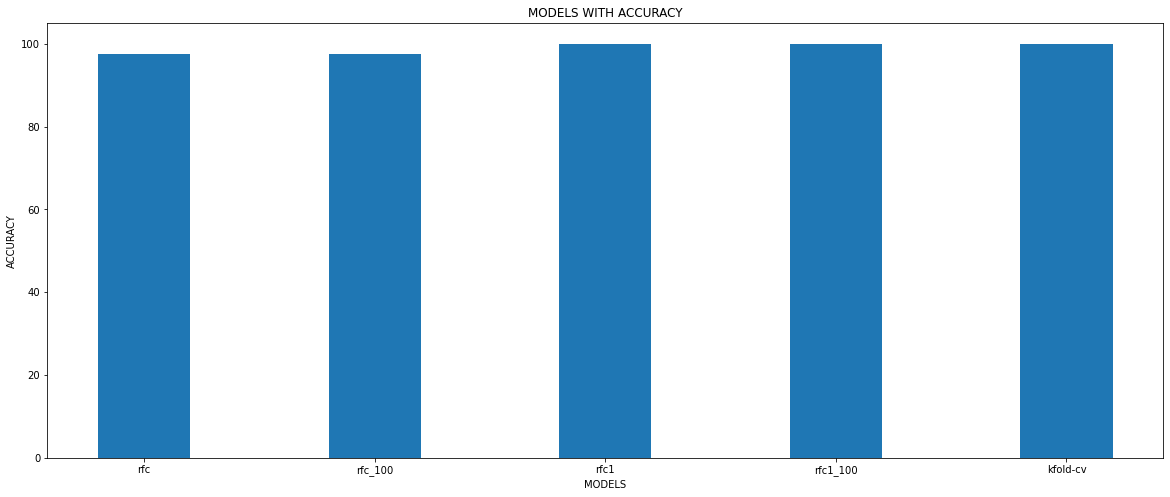

In [99]:
fig=plt.figure(figsize=(20,8))
plt.bar(models,accuracy,width=0.4)
plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.title("MODELS WITH ACCURACY")
plt.show()

<center>FIG.NO-8</center>

# PRECISION AND RECALL ANALYSIS

Precision: Accuracy of positive predictions.

Recall: Percent of positive cases the model get.

Since we are dealing with imbalanced dataset for classification, we will use macro average for precision and recall since it treats all classes equally.

RANDOM FOREST CLASSIFIER WITH 10 DECISON TREES:
    
    Precision:0.98
        
    Recall:0.97

RANDOM FOREST CLASSIFIER WITH 100 DECISON TREES:
    
    Precision:0.98
        
    Recall:0.97
        
RANDOM FOREST CLASSIFIER WITH SELECTED FEATURES AND 100 DECISON TREES:
    
    Precision:1.00
        
    Recall:1.00

# RESULTS & CONCLUSION

1.I build a Random Forest Classifier to predict the risk of suicide attacks.

2.I build two models, one with 10 decision-trees and another one with 100 decision-trees.

3.The model accuracy score with both 10 decision-trees and 100 decision-trees is 0.9740. 

4.I expected that the accuracy increases with number of decision-trees in the model.But it is seemed to be converged in our case.

4.I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. 

5.The most important feature is 'employeecompensation' and least important feature is 'population'.

6.I have removed the 'population' variable from the model, rebuild it and checked its accuracy. The accuracy of the model with 'population' variable removed is 1.000. 

7.The accuracy of the model with all the variables taken into account is 0.9740. So, we can see that the model accuracy has been improved with  variable removed from the model.

8.10 fold cross validation has been carried out with decision tree with random parameters to meet some improvements.As expected, the accuracy was improved by performing kfold validation(Mean-score=1.0)

9.Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.

10.The precision and recall values are same for both the classifiers with 10 and 100 trees. But with randomclassifier of selected features, we get 100% accuracy.